# Brazil - No Show Appointment - Deu Migué <a id='topo'></a>

## Table of Contents
<ul>
<li>
    <a href="#intro">Introduction</a>
    <ul>
        <li><a href="#objective">Objective</a></li>
        <li><a href="#columns">Columns descriptions and insights</a></li>
    </ul>
</li>
<li>
    <a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a href="#general">General Properties</a></li>
        <li><a href="#snake">Change columns to snake case</a></li>
        <li><a href="#check_unique">Check unique values</a></li>
        <li><a href="#convert_date">Convert to datetime</a></li>
        <li><a href="#check_date">Check the date fields</a></li>
        <ul>
            <li><a href="#check_schecule_appointment">Check if ScheduledDay > AppointmentDay</a></li>
            <li><a href="#clean_schedule">Clean ScheduledDay >= AppointmentDay</a></li>
        </ul>
        <li><a href="#check_appointment">Check AppointmentID</a></li>
        <li><a href="#check_patient">Check PatientId</a></li>
        <li><a href="#no_show">Change no show column</a></li>
        <li><a href="#check_age">Check age</a></li>
        <li><a href="#check_nei">Check neighbourhood</a></li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction <a id='intro'></a>

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

You can download the dataset [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv). Put the file in same directory of this file and rename it to 'brasil_migue.csv'.

### Objective <a id='objective'></a>
The objective of this analysis is to discover some correlations about the reasons of patients that not show up in a scheduled appointment.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('brasil_migue.csv')

In [4]:
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


## Columns descriptions and insights <a id='columns'></a>

The columns that is not listed below are considered self explained.
- **Scholarship** - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
    - Could indicate the real scholarship of the patient. The information if the patition is in the welfare could be another column.
    
- **ScheduledDay** - The day that the patient set up their appointment. 
    - In the first lines listed above is possible to see some problems in this data, some dates are the same or after the appointment day. The same day is a problem because in brazilian public hospiltals an appointment is scheduled only months before. This data does not seem truthful.

- **Neighbourhood** - The place where the hospital is located and not where the patient lives.
    - A data set with informations about the region could be useful. Only the the name of the place, where the hospital is located, become diffcult to link the place with the reason that the patient does not show up. The location where the patient live could be useful because some hospitals receive patients from another cities.

- **Handcap** - I am considering that the handicap means people with disabilities.

- **No-show** - Yes if the patient does not show up.
    - I could invert the 'yes' data value mean to when the patient showed up. The column name could be showed up in this case. This could avoid misunderstood.
    
- **SMS_received** - If the patient received a sms remembering about the appointment.
    - I have doubts about if this data is relevant. There is some reasons about my doubts that I am going to try to explain below:
        - This system of reminder is not common in Brazil
        - Some patients are enrolled in the welfare program Bolsa Família. Most certain that they do not have cellphones. This can be cheked more later in the data analysis.
        - The data do not explain when the sms was received.

> **Note**: The insights above are only my first impressions about the data. I am going to do a more profund analysis later in this document.  

## Data Wrangling <a id='wrangling'/>

### General Properties <a id='general'></a>
Display all the info about the data. <a href='#topo'>Top</a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no mising values in the data frame. Let's check if has duplicates values

In [6]:
sum(df.duplicated())

0

### Change columns to snake case <a id="snake"/>
I am going to change the columns to snake case to become more easy to explore the data set. <a href='#topo'>Top</a>

In [7]:
import data_frame_helper

In [8]:
data_frame_helper.columns_to_snake_case(df).columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

### Check unique values <a id='check_unique'></a>
The columns below should just have two possible values each. Let's check if is allright with the unique function. <a href='#topo'>Top</a>

In [10]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [11]:
df.scholarship.unique()

array([0, 1], dtype=int64)

In [12]:
df.hipertension.unique()

array([1, 0], dtype=int64)

In [13]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [14]:
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [15]:
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
df.sms_received.unique()

array([0, 1], dtype=int64)

In [17]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

According with the data set documentation, the Handcap column should be true or false. Futhermore, I am going to check if this data has some correlation with the patients that do not show up.

### Convert to datetime <a id='convert_date'></a>
First, let's convert to datetime the scheduled day and appointment day column. <a href='#topo'>Top</a>

In [18]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


### Check the date fields <a id='check_date'></a>
How we see before, the data set has some inconsistent data in the date fields, Scheduled Day and Appointment Day. Let's check with more details in the steps below. <a href='#topo'>Top</a>

#### Check if ScheduledDay > AppointmentDay <a id='check_schecule_appointment'></a>
I want to check how many Scheduled days are after the AppointmentDay. <a href='#topo'>Top</a>

In [20]:
df.query('scheduled_day > appointment_day')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
19,7.223289e+12,5640433,F,2016-04-29 10:43:14,2016-04-29,46,DA PENHA,0,0,0,0,0,0,No
24,8.734858e+12,5641780,F,2016-04-29 14:19:19,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No
26,2.578785e+10,5641781,F,2016-04-29 14:19:42,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No
28,5.926172e+12,5642400,M,2016-04-29 15:48:02,2016-04-29,51,SÃO PEDRO,0,0,0,0,0,0,No


In [21]:
sum(df.scheduled_day > df.appointment_day)

38568

In [22]:
sum(df.scheduled_day == df.appointment_day)

0

I want to check if some patient in the results above received a sms

In [23]:
df.query('scheduled_day > appointment_day and sms_received == 1').sms_received.count()

0

I am going to check if Appointment Day column has some value with time

In [24]:
sum(df.appointment_day.apply(lambda x: x.hour + x.minute + x.second + x.microsecond))

0

The column Appointment Day does not have time. I am going to check if has scheduled day value after the appointment day

In [25]:
different_day_array = []
for index, row in df.query('scheduled_day > appointment_day').iterrows():
    if row['scheduled_day'].day != row['appointment_day'].day:
        different_day_array.append(index)

In [26]:
df.loc[different_day_array].head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


The dataset has values with scheduled day after the appointment day. I am going to remove these data.
The appointment values does not have time, so the appointment date in the same day of scheduled date could be after the schedule. But in Brazil there is no possible that the scheduled and appointment day be the same, so I am going to remove the rows that contains schedule equal or after the appointment.

#### Clean ScheduledDay >= AppointmentDay <a id='clean_schedule'></a>
<a href='#topo'>Top</a>

In [27]:
df = df.query('scheduled_day < appointment_day')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 14 columns):
patient_id         71959 non-null float64
appointment_id     71959 non-null int64
gender             71959 non-null object
scheduled_day      71959 non-null datetime64[ns]
appointment_day    71959 non-null datetime64[ns]
age                71959 non-null int64
neighbourhood      71959 non-null object
scholarship        71959 non-null int64
hipertension       71959 non-null int64
diabetes           71959 non-null int64
alcoholism         71959 non-null int64
handcap            71959 non-null int64
sms_received       71959 non-null int64
no_show            71959 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 8.2+ MB


### Check AppointmentID <a id='check_appointment'></a>
Beforehand, I am goind to check if the data has Appointment id duplicated. <a href='#topo'>Top</a>

In [29]:
df.appointment_id.duplicated().sum()

0

### Check PatientId <a id='check_patient'></a>
Maybe the patient can have more than one appointment. Let's check. <a href='#topo'>Top</a>

In [30]:
# Must be true to has more than one appointment
len(df.patient_id.unique()) != len(df.patient_id)

True

The data has patients with more than one appointment. Let's check how many PatientId are duplicated

In [31]:
df.patient_id.duplicated().sum()

26119

I am going to check the mean, min and max appointment quantity by patient

In [32]:
df.groupby(['patient_id']).count().appointment_id.describe(percentiles=[.25, .5, .75, .85, .90, .95, .98, .99, 1])

count    45840.000000
mean         1.569786
std          1.208899
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
85%          2.000000
90%          3.000000
95%          4.000000
98%          5.000000
99%          6.000000
100%        30.000000
max         30.000000
Name: appointment_id, dtype: float64

The mean is 1.56 but Seems that some patients has 30 appointments. Let's  check these patients

In [33]:
index = df.groupby(['patient_id']).count().query('appointment_id == 30').index.tolist()
index

[1484143378533.0]

Just one patient has 30 appointments

In [34]:
df.query('patient_id == {}'.format(index))

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
2304,1.484143e+12,5573128,F,2016-04-12 11:56:51,2016-04-29,56,GRANDE VITÓRIA,0,1,0,0,0,1,No
13840,1.484143e+12,5640785,F,2016-04-29 11:24:43,2016-05-03,56,GRANDE VITÓRIA,0,1,0,0,0,1,No
13841,1.484143e+12,5669806,F,2016-05-06 11:43:15,2016-05-10,56,GRANDE VITÓRIA,0,1,0,0,0,1,No
13850,1.484143e+12,5653073,F,2016-05-03 11:11:49,2016-05-05,56,GRANDE VITÓRIA,0,1,0,0,0,0,No
13851,1.484143e+12,5680145,F,2016-05-10 11:10:19,2016-05-12,56,GRANDE VITÓRIA,0,1,0,0,0,0,Yes
21811,1.484143e+12,5624634,F,2016-04-26 16:36:37,2016-05-02,56,GRANDE VITÓRIA,0,1,0,0,0,1,Yes
21812,1.484143e+12,5649276,F,2016-05-02 18:56:40,2016-05-09,56,GRANDE VITÓRIA,0,1,0,0,0,0,No
21813,1.484143e+12,5682707,F,2016-05-10 18:22:16,2016-05-16,56,GRANDE VITÓRIA,0,1,0,0,0,0,No
21814,1.484143e+12,5734852,F,2016-05-24 16:18:11,2016-05-30,56,GRANDE VITÓRIA,0,1,0,0,0,1,No
21865,1.484143e+12,5624674,F,2016-04-26 16:41:54,2016-05-05,56,GRANDE VITÓRIA,0,1,0,0,0,1,No


### Change no show column <a id='no_show'/>
In the column no show, the values Yes means that the patient no showed up. Let's change the values to means that 1 is when the patient showed up and 0 not. I am going to change the column name to showed up to avoid misunderstood. <a href='#topo'>Top</a>

In [35]:
import brasil_migue as brm

In [36]:
df.no_show.head(4)

5     No
6    Yes
7    Yes
9     No
Name: no_show, dtype: object

In [37]:
brm.invert_no_show_values(df).showed_up.head(4)

5    1
6    0
7    0
9    1
Name: showed_up, dtype: int64

In [38]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'showed_up'],
      dtype='object')

### Check age <a id='check_age'/>
I am going to check the column age. <a href='#topo'>Top</a>

In [39]:
df.age.describe()

count    71959.000000
mean        38.502564
std         22.925421
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        115.000000
Name: age, dtype: float64

In [40]:
df.age.value_counts()

0      2131
52     1144
53     1132
56     1132
57     1126
50     1121
54     1109
49     1107
1      1084
59     1081
51     1073
36     1040
58     1038
55     1027
30     1023
39     1018
60     1006
32     1004
37      997
38      995
34      987
33      976
6       962
19      960
47      956
21      954
61      954
44      950
31      944
28      944
       ... 
71      473
74      450
72      428
78      405
75      401
76      379
77      378
80      358
81      291
82      258
79      240
83      210
84      201
85      181
86      169
87      129
89      123
88       81
90       80
92       57
91       47
93       34
94       27
95       12
97        6
98        5
96        5
100       4
115       4
102       1
Name: age, Length: 102, dtype: int64

As we can see above, there is some values with age == 0. I can imagine that is a child with just months of live. I am going to check if data is ok for this case.

In [41]:
df.query('age == 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,1
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,1
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,1
104,3.326985e+12,5632495,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,0
132,8.468587e+14,5560742,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,0
193,2.379698e+11,5532452,F,2016-03-31 11:14:57,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,1,1
194,4.442538e+11,5539566,M,2016-04-01 15:17:10,2016-04-29,0,REDENÇÃO,0,0,0,0,0,0,1
256,8.599713e+10,5629906,F,2016-04-27 14:19:02,2016-04-29,0,ARIOVALDO FAVALESSA,0,0,0,0,0,0,0
358,7.349270e+14,5531831,F,2016-03-31 10:07:18,2016-04-29,0,CONSOLAÇÃO,0,0,0,0,0,0,0
359,7.975283e+11,5551583,M,2016-04-06 14:20:30,2016-04-29,0,CONSOLAÇÃO,0,0,0,0,0,0,1


Seems alright. Let's check the ages avaliable in the data set.

In [42]:
ages = df.age.unique()
ages.sort()
ages

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98, 100, 102, 115], dtype=int64)

We have all the ages, with no interruption, until 98 years old.

### Check neighbourhood <a id='check_nei'/>
 The column neighbourhood could have values duplicated with different cases. Let's check it. <a href='#topo'>Top</a>

In [43]:
df.neighbourhood.unique()

array(['REPÚBLICA', 'GOIABEIRAS', 'CONQUISTA', 'NOVA PALESTINA',
       'SÃO CRISTÓVÃO', 'TABUAZEIRO', 'MARUÍPE', 'GRANDE VITÓRIA',
       'SÃO BENEDITO', 'ILHA DAS CAIEIRAS', 'JARDIM DA PENHA',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'MARIA ORTIZ', 'JABOUR',
       'ANTÔNIO HONÓRIO', 'RESISTÊNCIA', 'ILHA DE SANTA MARIA',
       'JUCUTUQUARA', 'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA',
       'PRAIA DO SUÁ', 'DA PENHA', 'ITARARÉ', 'ANDORINHAS', 'SÃO PEDRO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTOS DUMONT', 'CARATOÍRA',
       'ARIOVALDO FAVALESSA', 'UNIVERSITÁRIO', 'SANTA MARTHA',
       'JOANA D´ARC', 'CONSOLAÇÃO', 'JARDIM CAMBURI', 'BOA VISTA',
       'MORADA DE CAMBURI', 'CENTRO', 'PARQUE MOSCOSO', 'SANTA CLARA',
       'DO MOSCOSO', 'SANTA LUÍZA', 'PRAIA DO CANTO', 'SANTA LÚCIA',
       'BARRO VERMELHO', 'BENTO FERREIRA', 'ESTRELINHA', 'FORTE SÃO JOÃO',
       'FONTE GRANDE', 'ENSEADA DO SUÁ', 'SANTOS REIS', 'PIEDADE',
       'JESUS DE NAZARETH', 'SANTA TEREZA', 'GURIGI

## Exploratory Data Analysis <a id='eda'></a>

Now is time to explore some correlations between patients that do not show up in your appointments. <a href='#topo'>Top</a>

### What the percentage of patients that not showed up?
First. I want to know how many patients are missing your appointment.

In [44]:
not_showed_up = df.query('showed_up == 0').showed_up.count()
(not_showed_up / df.showed_up.count()) * 100

28.5190177740102

28.52% patients do not showed up. 

### What are the correlations between age and patients that not showed up?
I am going to check if age is a fact of missing appointments. First I am going to divide the dataframe in 2 groups, the showed up and the not shoewd up.

In [45]:
df_not_showed_up = df.query('showed_up == 0')
df_showed_up = df.query('showed_up == 1')

In [46]:
df_not_showed_up.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,0
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,0


In [47]:
df_showed_up.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1
12,5.666548e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,1


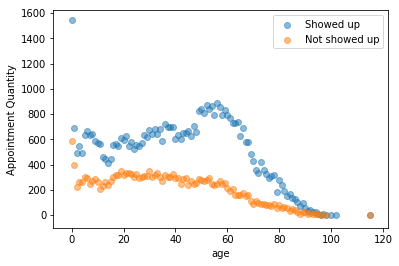

In [48]:
plt.figure(figsize=(6, 4))
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'age').show()

Between 0 to 50 years old, the patients of the both groups have the same pattern. Both have an increase of number of appointments between 

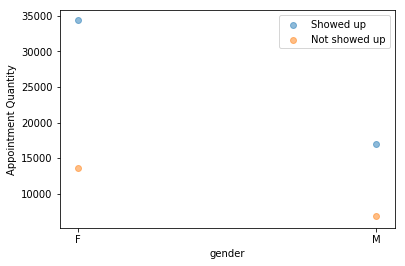

In [49]:
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'gender').show()

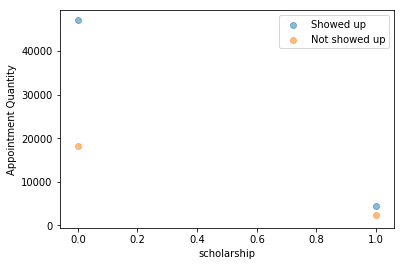

In [51]:
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'scholarship').show()

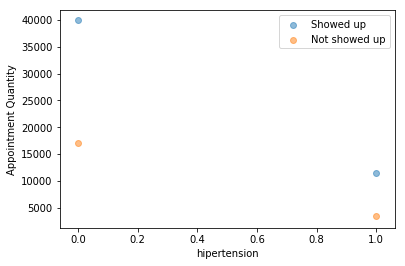

In [53]:
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'hipertension').show()

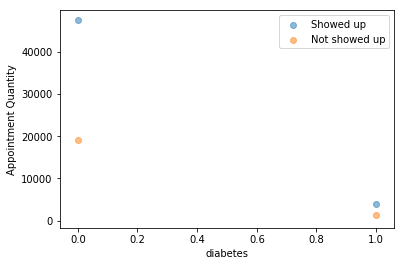

In [54]:
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'diabetes').show()

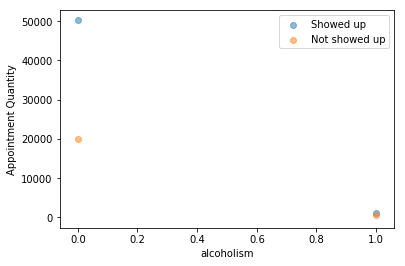

In [55]:
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'alcoholism').show()

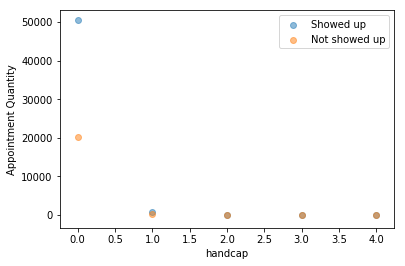

In [56]:
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'handcap').show()

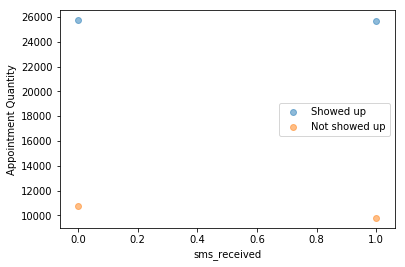

In [57]:
brm.build_column_scatter_plot(plt, df_showed_up, df_not_showed_up, 'sms_received').show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!